## Post Quantum Cryptography
### by Devanshi Jain

Arguably today’s most wide-spread asymmetric cryptographic algorithms are the Rivest-Shamir-Adleman (RSA) cryptosystem, Diffie-Hellman key exchange (DH), and a variety of primitives from the field of Elliptic-Curve Cryptography (ECC), e.g., ECDSA, EdDSA, ECDH, etc. These cryptosystems are based on the hardness of the integer-factorization problem and the discrete-logarithm problem. Using today’s computing systems, no efficient algorithms for solving these problems are known. However, the picture changes drastically if quantum computers are taken into account. 

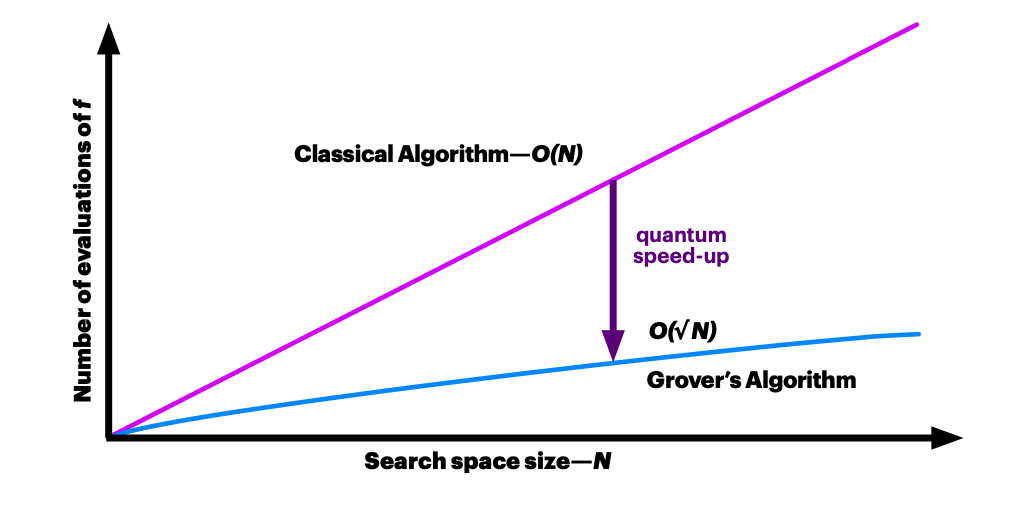

In the 1990s, Shor proposed algorithms that can solve both the integer-factorization problem and the discrete-logarithm problem in polynomial time on a quantum computer. In order to provide alternatives to the threatened schemes, the field of Post-Quantum Cryptography (PQC) emerged in the 2000s and has received increased attention recently, most noticeably due to a standardization process for PQC schemes started by NIST (National Institute of Standards and Technology) in 2017.

Currently, there are five categories of mathematical problems that are under investigation for PQC: 
 - code-based systems, 
 - lattice-based systems, 
 - hash-based systems, 
 - systems based on multivariate polynomial equations, and 
 - systems based on supersingular isogenies of elliptic curves. 

Each of these categories has advantages and disadvantages. They vary in the performance measures (sizes of public and private keys, sizes of ciphertext and key-exchange messages, computational cost, etc.) and in maturity: some schemes (e.g., some code-based schemes and hash-based signature schemes) are considered well-understood and there is a general agreement on the required security parameters while other schemes are more recent and the exact security that they provide is yet under investigation.

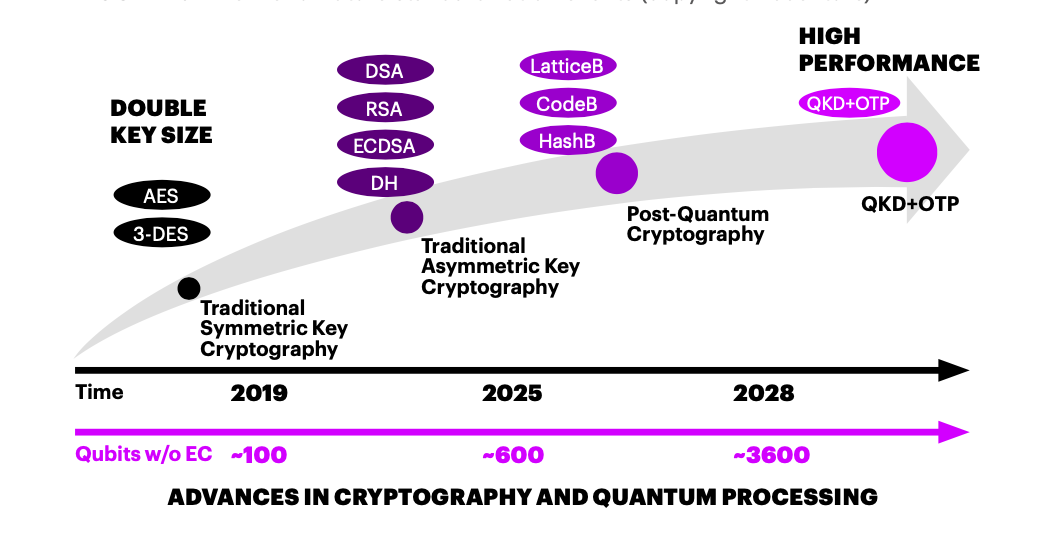

## Lattice-Based Cryptography

In this project, I aim to discuss some of the recent progress in lattice-based cryptography. Lattice-based cryptographic constructions hold a great promise for post-quantum cryptography, as they enjoy very strong security proofs based on worst-case hardness, relatively efficient implementations, as well as great simplicity. Lattice-based cryptography is believed to be secure against quantum computers.

#### So, what is a lattice? 

A lattice is a set of points in n-dimensional space with a periodic structure. For instance, here is a Lettuce-Lattice. (I had to introduce a pun, i'm sorry)

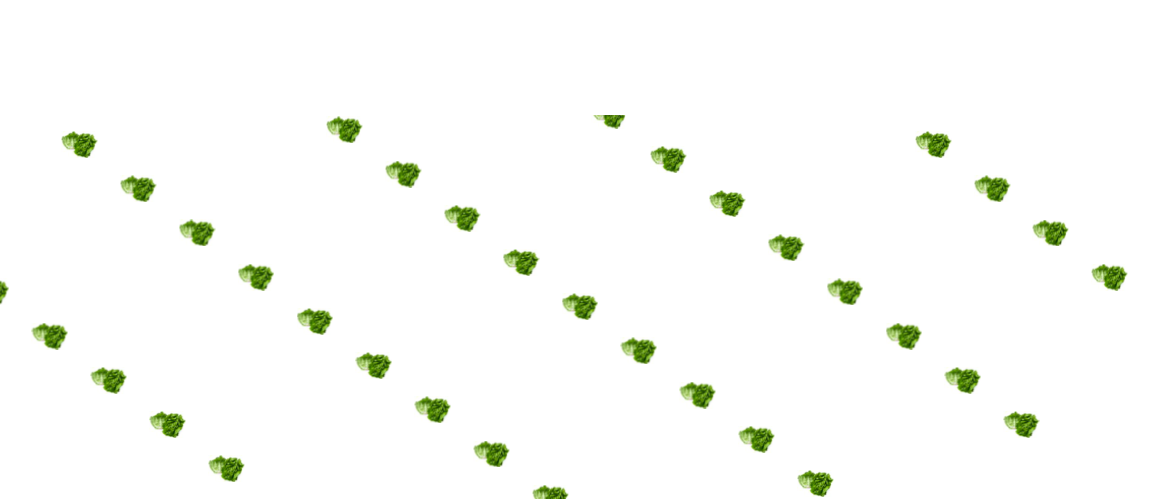

Figure: A lattice of lettuces is a repeating grid of lettuces in n-dimensional space.

We can think of a lattice as being generated by integer multiples of some basis vectors. Given n-linearly independent vectors b1, . . . , bn $\in \mathbb{R}^n$, the lattice generated by them is the set of vectors
$\mathbb{L}(b_1,\dots,b_n) = \{\sum_{i=1}^{n} x_ib_i : x_i \in \mathbb{Z}\}$. The vectors $b_1,\dots,b_n$ are the basis of the lattice.

The way lattices can be used in cryptography is by no means obvious, and was discovered in a breakthrough paper by Ajtai, titled 'Generating hard instances of lattice problems'. His result has by now developed into a whole area of research whose main focus is on expanding the scope of lattice-based cryptography and on creating more practical lattice-based cryptosystems.

###### Let's describe the computational problems involving lattices, whose hardness lies at the heart of lattice-based cryptography.

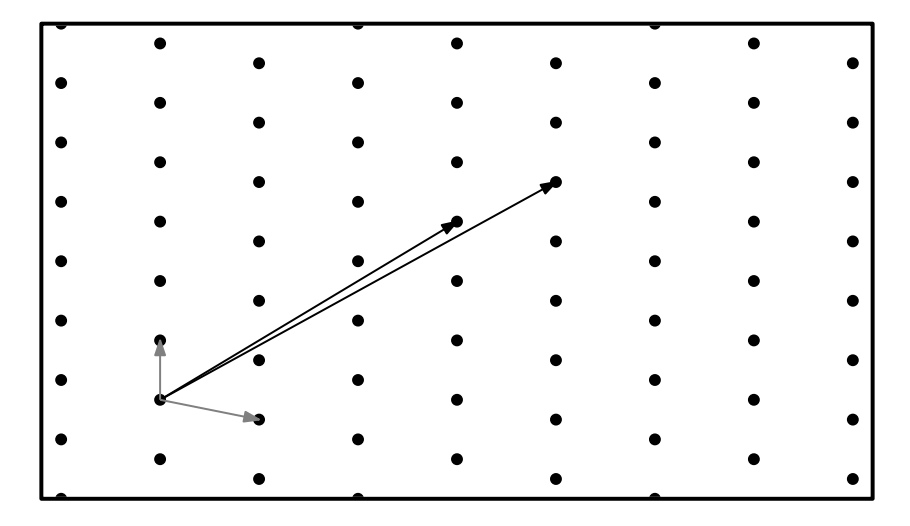

## Variations on the problem of Lattice Reduction

# Short Vector Problem (SVP)


###### Given a set of vectors, find a short, non-zero integer combination (i.e. short element of the lattice generated by original input vectors.)

We have three 3-dimensional vectors, and we would like to know what integers we can put in place of the question marks to make the output short, with norm of choice -

?(64,218,133) + ?(71,205,111) + ?(28,-48,-84)
-322(64,218,133) + 323(71,205,111) - 83(28,-48,-84) = (1,3,-1)


# Simultaneous Approximation Problem


Simultaneous Approximation Problem, starts with just one vector and we need to find an integer multiple that is near an integer point. (i.e. all output coordinates are close to integers)

We have a 3-dimensional vector, what integer can we out in place of the question-mark - 

?$(\sqrt[-3]{5}, 13/51, \pi) \approx$ (61.99, 27.02, 333.01)


For a vector with irrational entries there is no limit to how close you can get to an integer point and still not land on it. So, so it is pretty common to bound the multiple that you might take. So, if our bound is 200 than 106 would be a great choice. Alternatively, if the input vector is rational, the other possibility would be to exclude the trivial solution i.e. multiples of the least common denominator.

#### A Brief History

- 1773: Lagrange/ Gauss algorithm solve the lattice reduction problem in 2-dimensions.

- 1842: The study of lattice reduction in higher dimensions begins with Dirrichlet when he looked into simultaneous approximation.

- 1982: The big-bang in this subject - LLL Agorithm solves approx-SVP within a factor of $2^{n/2}$.

- 1983: Lagarias used LLL to reduce simultaneous approximation to short vector problem.

In this project, we will try to outline the reverse reduction.

- 1996: Ajtai-Dwork Cryptosystem relies on the hardness of lattice reduction in unique-SVP

- 2020: Agrawal gave the reverse of the Lagarias reduction, and showed how SVP can be solved using a simultaneous approximation oracle.

### Lattice reduction aims to get a good basis from a bad one.

In [45]:
A = [6 3; 14 8]; A

2×2 Matrix{Int64}:
  6  3
 14  8

Why is this lattice bad?
- We use lattice points to approximate things that are not in the lattice. For example:

In [46]:
C = [11.6; 4.2]; C

2-element Vector{Float64}:
 11.6
  4.2

$\begin{bmatrix}
6 & 3\\
14 & 8
\end{bmatrix} \times \begin{bmatrix}
? \\
?
\end{bmatrix} = \begin{bmatrix}
11.6\\
4.2
\end{bmatrix}$

In [47]:
A\C

2-element Vector{Float64}:
  13.36666666666667
 -22.866666666666674

So, 13(6,14) - 23(3,8) = (9,-2)

v/s With the orthogonal basis given below. All it takes to be in this lattice is that x-coordinate has to be a multiple of 3 and y-coordinate has to be a multiple of 2. IT would be much easier to approximate that point.

In [48]:
B = [3 0; 0 2]; B

2×2 Matrix{Int64}:
 3  0
 0  2

Nearest multiples of 3 and 2 respectively are 12 and 4.
(11.6, 4.2) $\approx$ (12,4). Now, we simply multiply the inverse of the matrix with (12,4), we get.

In [51]:
Dnew = [12,4]; Dnew

2-element Vector{Int64}:
 12
  4

In [53]:
A\Dnew

2-element Vector{Float64}:
  14.000000000000009
 -24.000000000000014

So, 14(6,14) - 24(3,8) = (12,4)

Thus our nearest lattice point was 14, -24 and not 13, -23.

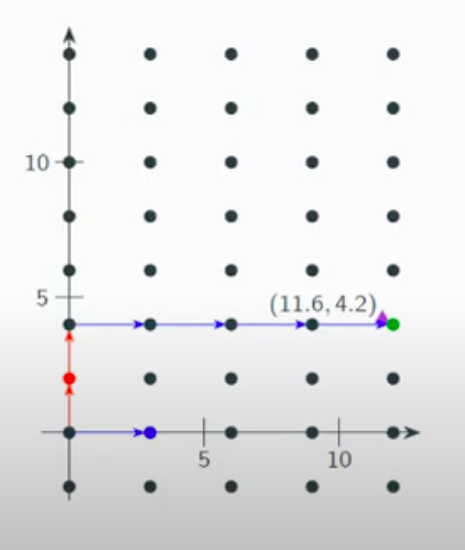

The problem gets hard as the dimensions increase. We can see why this problem is useful in cryptography. If Alice and Bob want to share a secret over the internet, if I have the great basis, B, for the lattice. Alice could make the bad basis, A, publically availaible, which describes as the exact same lattice. To send Bob the secret, you can encode it as an integer pair, in this case (14.-24). Multiply this (14,-24) with public basis to get (12,4). Disturb this coordinate (14,-24) ever so slightly that others cannot solve to get the coordinate using their 'bad' lattice. Unless they have a good lattice reduction algorithm, they cannot figure out the secret.

#### Special Lattices

In [55]:
M = [39 -106 23 -99; 123 -15 128 81; 53 1 -185 123; -84 13 -102 -47]; M

4×4 Matrix{Int64}:
  39  -106    23  -99
 123   -15   128   81
  53     1  -185  123
 -84    13  -102  -47

Note: Matrix M is constructed such that determinant is $5^3$. Thus, ranks over $\mathbb{F}_5$ are at most 3.

In [34]:
N = [43 -61 -31 153; 73 24 194 -122; 4 92 192 89; 101 -42 123 56]; N

4×4 Matrix{Int64}:
  43  -61  -31   153
  73   24  194  -122
   4   92  192    89
 101  -42  123    56

Note: Matrix N has rank 1 over $\mathbb{F}_5$. Over $\mathbb{Z}$, it is generated by x and 5$\mathbb{Z}^2$. We obtain shortest vector is (-2,-2,-1,-1). By scaling we could take x/5 and $\mathbb{Z}^4$. Then, it is simultaneous. 
**We obtain the lattice by taking multiples of x over modulus D.** We took our arbitrary lattice reduction problem to a simultaneous approximation problem, where the input vector would be product of matrix inverse times z, i.e, $[c_1,c_2,c_3] ^{-1}\times z$. Since, $[c_1,c_2,c_3]$ is nearly scaled orthonormal, it preserves shortness.

#### Note: This is a very special case where determinant is divisible by D  and has rank 1 (mod D).

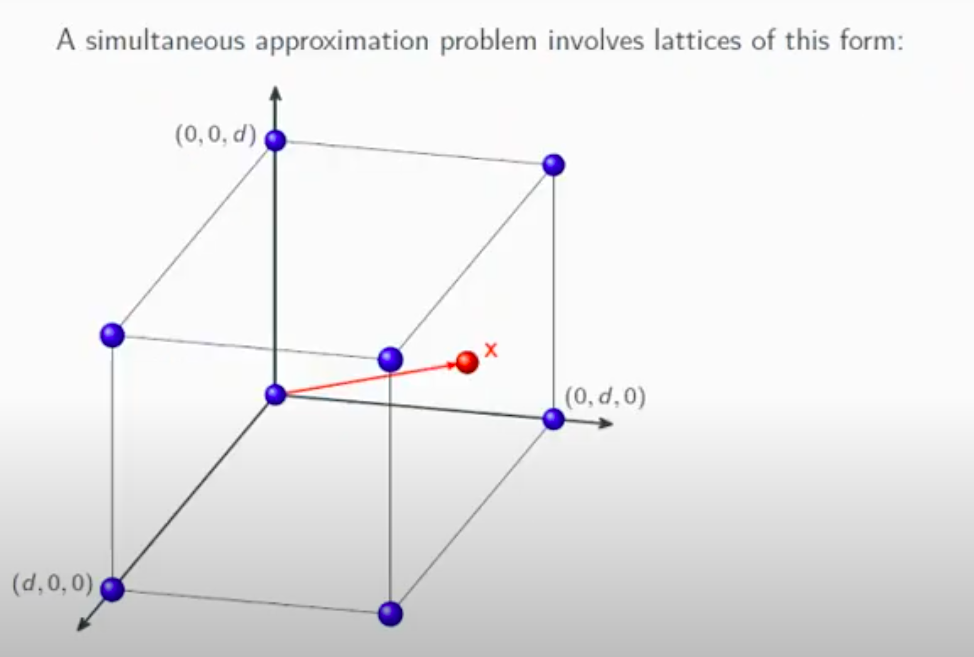

In cryptography, lattice technique is deeply involved in designing lattice-based cryptography systems, such as GGH and NTRU, and
attacking many other public-key cryptography systems, for example, RSA and knapsack.

FunFact: Any prime number p congruent to 1 mod 4 can be written as the sum of two squares.
Example: $5 \pmod{4} = 1 \pmod{4} => 5 = 1^2 + 2^2$